$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Im}{\mathbf{I}}
  \newcommand{\Ym}{\mathbf{Y}}
$
# Assignment #2 - Classification

<font color="blue"> Abdullah Al Raqibul Islam </font>

# INDEX

**I. Introduction**<br/>
II. Data<br/>
&emsp;&emsp;II.I. Reading the data<br/>
&emsp;&emsp;II.II. Preprocessing of the data<br/>
&emsp;&emsp;II.III. Visualization of the data<br/>
&emsp;&emsp;II.III. Visualization of the data<br/>
&emsp;&emsp;&emsp;&emsp;II.III.I. Correlation Heatmap<br/>
&emsp;&emsp;&emsp;&emsp;II.III.II. Pie-chart<br/>
&emsp;&emsp;&emsp;&emsp;II.III.III. Bar Graph<br/>
&emsp;&emsp;II.IV. Preliminary observation<br/>
&emsp;&emsp;**II.V. Preprocessing for Classification**<br/>
**III. Method**<br/>
&emsp;&emsp;III.I. Super Classs Definition<br/>
&emsp;&emsp;III.II. Pocket Algorithm<br/>
&emsp;&emsp;III.III. QDA<br/>
&emsp;&emsp;III.IV. LDA<br/>
&emsp;&emsp;III.V. Logistic Regression<br/>
**IV. Experiments**<br/>
&emsp;&emsp;IV.I. Evaluation Metrics<br/>
&emsp;&emsp;IV.II. Experimentation on Classification Algorithms<br/>
&emsp;&emsp;&emsp;&emsp;IV.II.I. Experimentation on Pocket Algorithm<br/>
&emsp;&emsp;&emsp;&emsp;IV.II.II. Experimentation on QDA<br/>
&emsp;&emsp;&emsp;&emsp;IV.II.III. Experimentation on LDA<br/>
&emsp;&emsp;&emsp;&emsp;IV.II.IV. Experimentation on Logistic Regression<br/>
&emsp;&emsp;IV.II. Train and Test Accuracies<br/>
&emsp;&emsp;IV.III. Classification Model Comparison<br/>
**V. Conclusions**<br/>
VI. References<br/>
VII. Extra Credit<br/>

# I. Introduction

In this assignment I have implemented four classification algorithms and evaluated the performance $w.r.t.$ a real-world dataset [[1]](https://www.kaggle.com/lodetomasi1995/income-classification). Classification can broadly be considered as the predictive modeling of data, that can be applied on further unknown data to approximate the input variables (i.e. $X$) to discrete output variables (ie. $y$). It is somewhat common for classification models to predict a continuous value as the probability of a given input to be classified to a specific output class. The predicted probability can further be converted into a class value by selecting the class label that has the highest probability.

In this assignment, I implemented the following four classification algorithms-

1. Pocket algorithm
2. QDA (Quadratic Discriminant Analysis)
3. LDA (Linear Discriminant Analysis)
4. Logistic Regression

Later I evaluated the performance of these algorithms by the evaluation metrics discribed later.

# II. Data

This dataset [[1]](https://www.kaggle.com/lodetomasi1995/income-classification) contains person's income information with 14 attributes. The dataset have `32561` rows in total. Here is the attribute list along with the data-type.

**Attribute Information:**
 0.   age (int64) 
 1.   workclass (object)
 2.   fnlwgt (int64)
 3.   education (object)
 4.   education-num (int64)
 5.   marital-status (object)
 6.   occupation (object)
 7.   relationship (object)
 8.   race (object)
 9.   sex (object)
 10.  capital-gain (int64)
 11.  capital-loss (int64)
 12.  hours-per-week (int64)
 13.  native-country (object)
 14.  income (object)

## II.I. Reading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading the data from csv datafile; using read_csv method from Pandas library
df_c = pd.read_csv("data/classification/income_evaluation.csv", sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')

# displaying all the columns data of top 10 rows in the jupyter notebook
pd.set_option('max_columns', 28)
df_c.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## II.II. Preprocessing of the data

In [2]:
# get the metadata; getting familiarized with columns and data-types
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From the "Non-Null Count" column above, we can observe all the rows contain same number of non-null counts. From this data we can sense that there is no null values in this dataset.

To confirm this, let's check it using library function.

In [3]:
# checking columns with null values
df_c.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

But we can observe that a couple of columns contains hypens (`-`). Cleaning up the column names that have `-` in the dataframe.

In [4]:
# clean up column names that have '-' in the dataframe

cols = df_c.columns
new_column_names = []

for col in cols:
    new_col = col.lstrip().rstrip().replace ("-", "_")
    new_column_names.append(new_col)

df_c.columns = new_column_names

df_c.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

Now will check the unique values in the columns and replace if any unwanted simbol found (i.e. `?`).

In [5]:
df_c.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

The `workclass` data contains `?`; replacing it by `Unknown`.

In [6]:
df_c.loc[df_c['workclass'] == '?', 'workclass'] = 'Unknown'

df_c.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Unknown', 'Self-emp-inc', 'Without-pay',
       'Never-worked'], dtype=object)

In [7]:
df_c.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [8]:
df_c.marital_status.unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [9]:
df_c.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

The `occupation` data contains `?`; replacing it by `Unknown`.

In [10]:
df_c.loc[df_c['occupation'] == '?', 'occupation'] = 'Unknown'

df_c.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Unknown', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [11]:
df_c.relationship.unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [12]:
df_c.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [13]:
df_c.sex.unique()

array(['Male', 'Female'], dtype=object)

In [14]:
df_c.native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

The `native_country` data contains `?`; replacing it by `Unknown`.

In [15]:
df_c.loc[df_c['native_country'] == '?', 'native_country'] = 'Unknown'

df_c.native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Unknown', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [16]:
df_c.income.unique()

array(['<=50K', '>50K'], dtype=object)

Updating `income` data contains by putting more meaningfull name (i.e. `Low-income`, `High-income`).

In [17]:
df_c.loc[df_c['income'] == '<=50K', 'income'] = 'Low-income'
df_c.loc[df_c['income'] == '>50K', 'income'] = 'High-income'

df_c.income.unique()

array(['Low-income', 'High-income'], dtype=object)

There is no null values in any particular columns. So we don't need to perform any data pre-processing here.

## II.III. Visualization of the data

### II.III.I. Correlation Heatmap

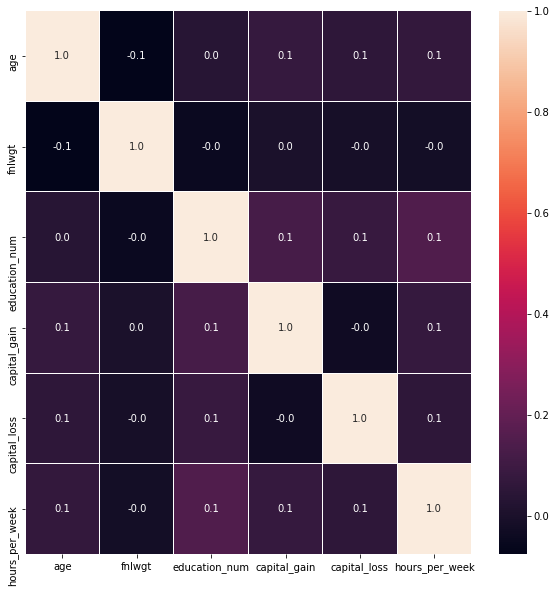

In [18]:
f = plt.subplots(figsize=(10, 10))
sns.heatmap(df_c.corr(), annot=True, linewidths=.1,fmt= '.1f')
plt.show()

**Observation:**
1. As `income` is a object type data, we can't retrieve correlation information w.r.t. that. This has been further discussed in section $II.V$.

### II.III.II. Pie-chart

In [19]:
eduList = []
eduCount = []
for edu_name, subset in df_c.groupby('education'):
    eduList.append(edu_name)
    eduCount.append(len(subset))
print(eduList)
print(eduCount)

workclassList = []
workclassCount = []
for class_name, subset in df_c.groupby('workclass'):
    workclassList.append(class_name)
    workclassCount.append(len(subset))
print(workclassList)
print(workclassCount)

maritalList = []
maritalCount = []
for marital_name, subset in df_c.groupby('marital_status'):
    maritalList.append(marital_name)
    maritalCount.append(len(subset))
print(maritalList)
print(maritalCount)

occupationList = []
occupationCount = []
for occupation_name, subset in df_c.groupby('occupation'):
    occupationList.append(occupation_name)
    occupationCount.append(len(subset))
print(occupationList)
print(occupationCount)

relationshipList = []
relationshipCount = []
for relationship_name, subset in df_c.groupby('relationship'):
    relationshipList.append(relationship_name)
    relationshipCount.append(len(subset))
print(relationshipList)
print(relationshipCount)

raceList = []
raceCount = []
for race_name, subset in df_c.groupby('race'):
    raceList.append(race_name)
    raceCount.append(len(subset))
print(raceList)
print(raceCount)

sexList = []
sexCount = []
for sex_name, subset in df_c.groupby('sex'):
    sexList.append(sex_name)
    sexCount.append(len(subset))
print(sexList)
print(sexCount)

countryList = []
countryCount = []
for country_name, subset in df_c.groupby('native_country'):
    countryList.append(country_name)
    countryCount.append(len(subset))
print(countryList)
print(countryCount)

incomeList = []
incomeCount = []
for income_name, subset in df_c.groupby('income'):
    incomeList.append(income_name)
    incomeCount.append(len(subset))
print(incomeList)
print(incomeCount)

['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']
[933, 1175, 433, 168, 333, 646, 514, 1067, 1382, 5355, 413, 10501, 1723, 51, 576, 7291]
['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Unknown', 'Without-pay']
[960, 2093, 7, 22696, 1116, 2541, 1298, 1836, 14]
['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']
[4443, 23, 14976, 418, 10683, 1025, 993]
['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving', 'Unknown']
[3770, 9, 4099, 4066, 994, 1370, 2002, 3295, 149, 4140, 649, 3650, 928, 1597, 1843]
['Husband', 'Not-in-family', 'Other-relati

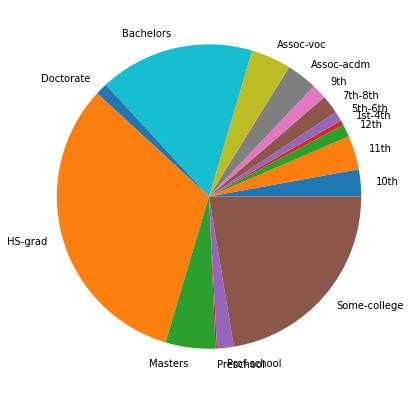

In [20]:
plt.figure(figsize = (7, 7))
plt.pie(eduCount, labels = eduList)
plt.show()

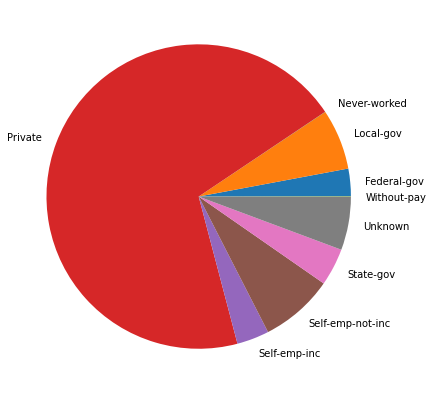

In [21]:
plt.figure(figsize = (7, 7))
plt.pie(workclassCount, labels = workclassList)
plt.show()

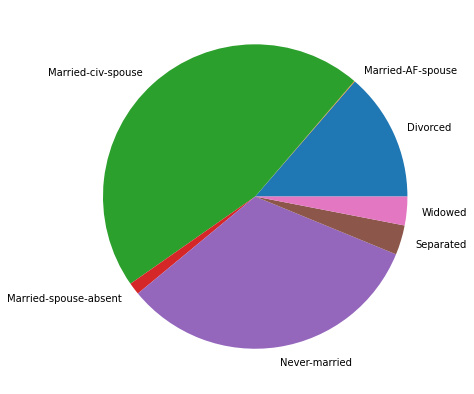

In [22]:
plt.figure(figsize = (7, 7))
plt.pie(maritalCount, labels = maritalList)
plt.show()

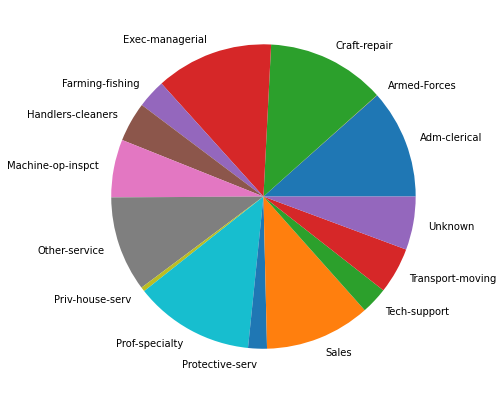

In [23]:
plt.figure(figsize = (7, 7))
plt.pie(occupationCount, labels = occupationList)
plt.show()

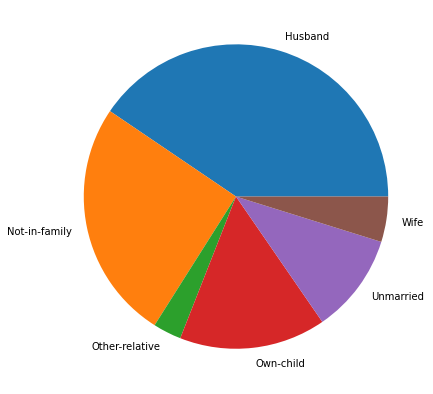

In [24]:
plt.figure(figsize = (7, 7))
plt.pie(relationshipCount, labels = relationshipList)
plt.show()

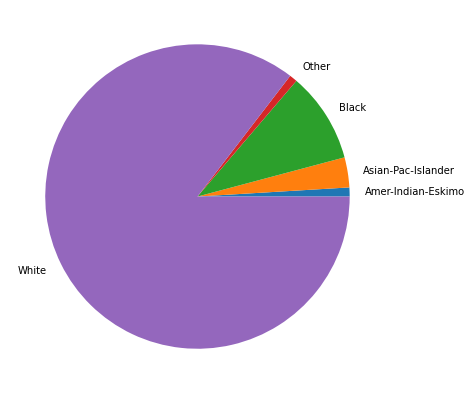

In [25]:
plt.figure(figsize = (7, 7))
plt.pie(raceCount, labels = raceList)
plt.show()

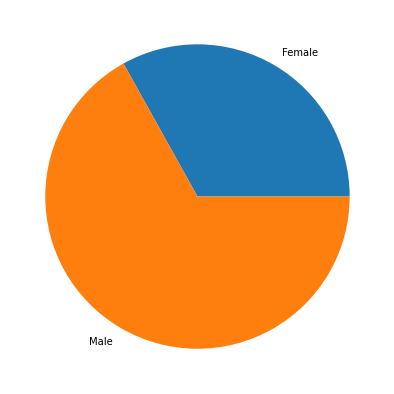

In [26]:
plt.figure(figsize = (7, 7))
plt.pie(sexCount, labels = sexList)
plt.show()

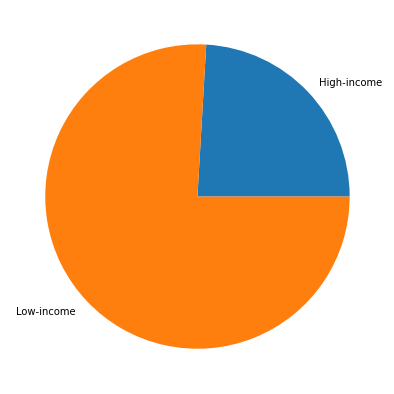

In [27]:
plt.figure(figsize = (7, 7))
plt.pie(incomeCount, labels = incomeList)
plt.show()

**Observation:**
1. The `pie-charts` compare parts of different attributes to the whole. It helps picturing which types of data exist more in the dataset and can influence making any decision.
2. From the pie-chart we can observe the largest employee comes from-
    * Gender: `Male`
    * Race: `White`
    * Relationship: `Husband`
    * Marital-status: `Married-civ-spouse`
    * Education: `HS-grad`
3. We can also observe that, most of the people work on the `private` sector.
4. Only 22% people earn high.

### II.III.III. Bar Graph

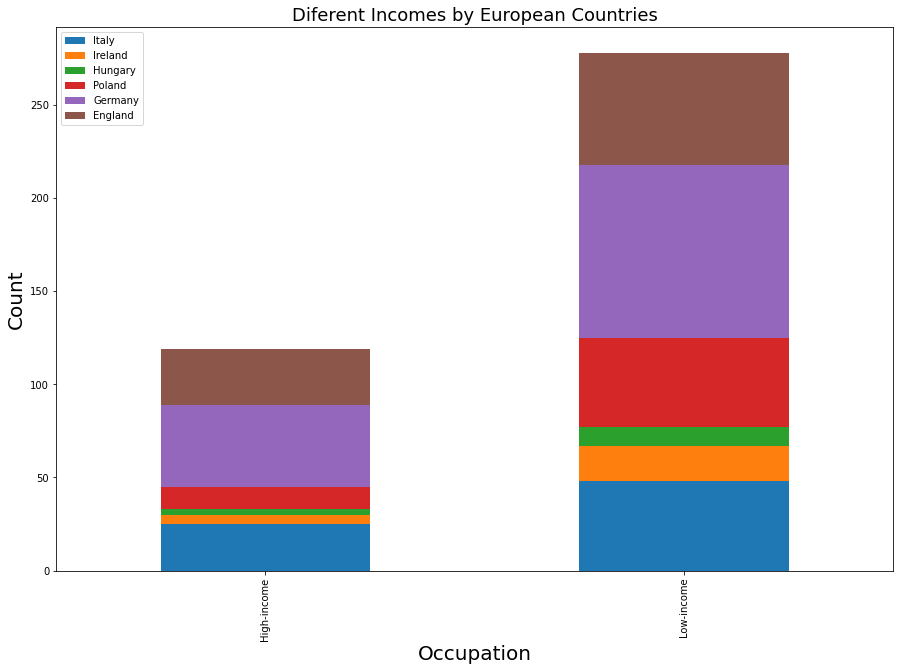

In [28]:
it = df_c[df_c.native_country == 'Italy']['income'].value_counts(sort=False)
ir = df_c[df_c.native_country == 'Ireland']['income'].value_counts(sort=False)
h = df_c[df_c.native_country == 'Hungary']['income'].value_counts(sort=False)
po = df_c[df_c.native_country == 'Poland']['income'].value_counts(sort=False)
g = df_c[df_c.native_country == 'Germany']['income'].value_counts(sort=False)
e = df_c[df_c.native_country == 'England']['income'].value_counts(sort=False)

pd.DataFrame({'Italy': it, 'Ireland': ir, 'Hungary': h, 'Poland': po, 'Germany': g, 'England': e}).plot.bar(stacked=True)
plt.gcf().set_size_inches(15, 10)
plt.title("Diferent Incomes by European Countries", size=18)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=20)
plt.ylabel('Count', size=20)
plt.show()

**Observation:**
1. From this chart we can observe that `Germany` have the highest employed among the `European` countries.

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='income', ylabel='count'>

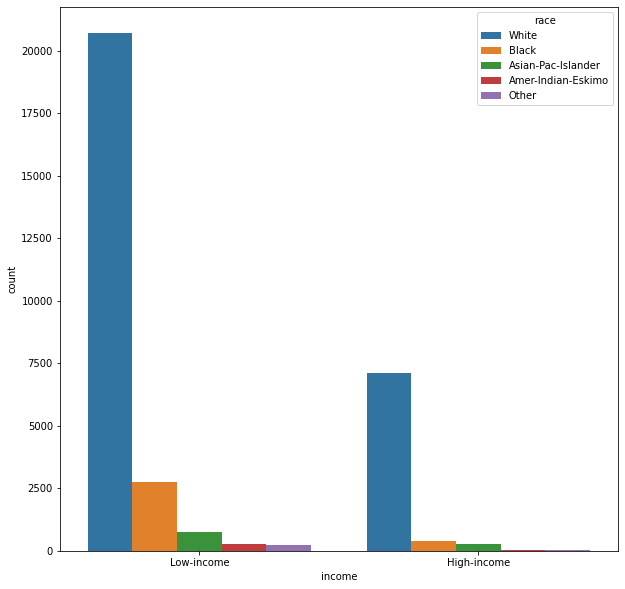

In [29]:
fig = plt.subplots(figsize=(10,10))
sns.countplot(df_c['income'],hue=df_c['race'])

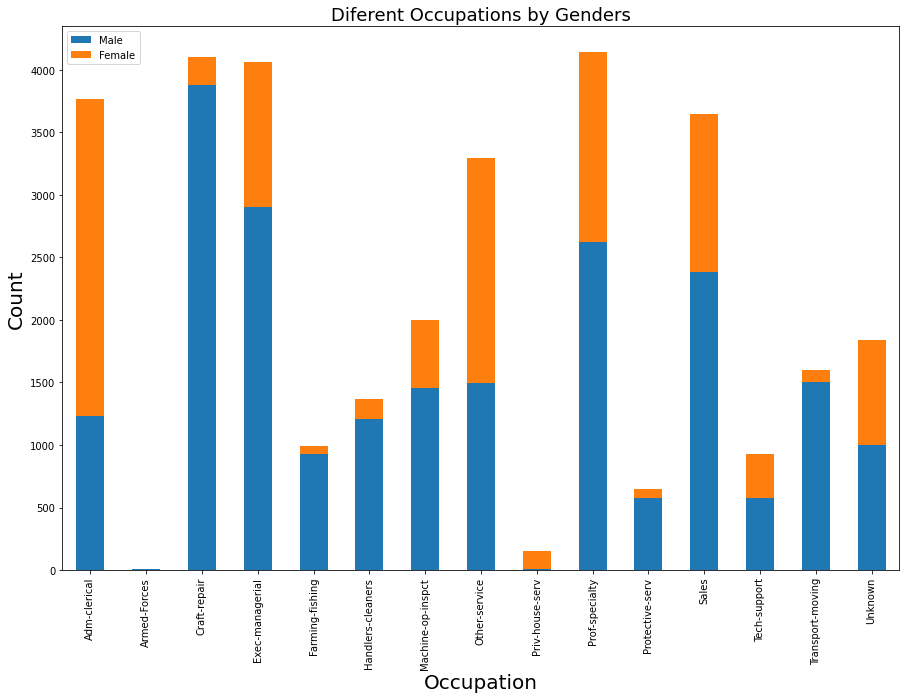

In [30]:
m = df_c[df_c.sex == 'Male']['occupation'].value_counts(sort=False)
w = df_c[df_c.sex == 'Female']['occupation'].value_counts(sort=False)
pd.DataFrame({'Male': m, 'Female': w}).plot.bar(stacked=True)
plt.gcf().set_size_inches(15, 10)
plt.title("Diferent Occupations by Genders", size=18)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=20)
plt.ylabel('Count', size=20)
plt.show()

**Observation:**
1. People from `White` and `Black` race acquire more jobs.
2. More female employee work in `Adm-clerical` and `Priv-house-serv`.
3. There is a `50-50` ratio in the `Other-service`.

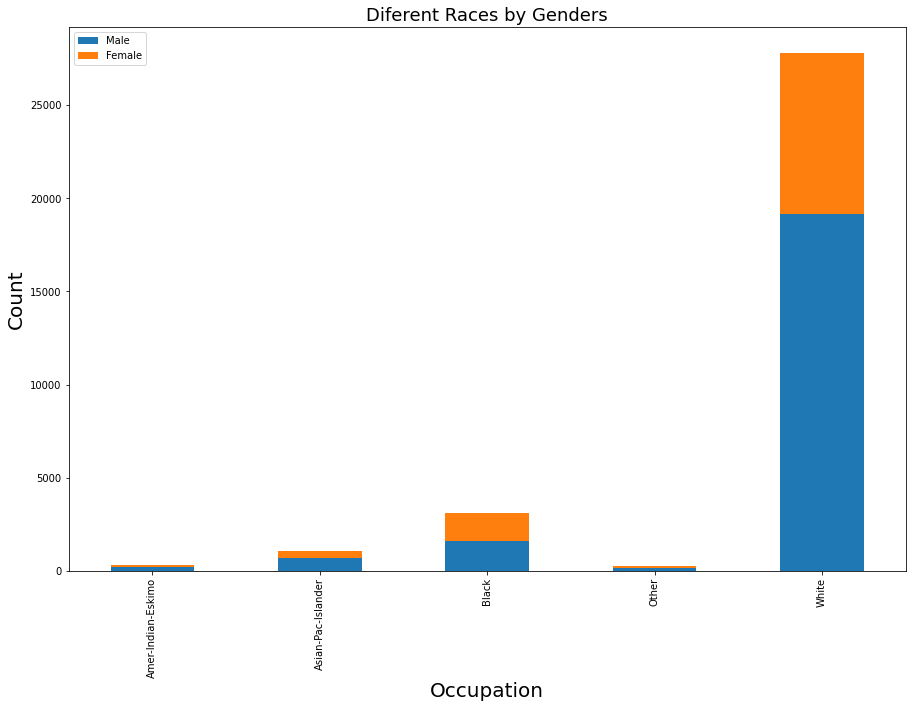

In [31]:
m = df_c[df_c.sex == 'Male']['race'].value_counts(sort=False)
w = df_c[df_c.sex == 'Female']['race'].value_counts(sort=False)
pd.DataFrame({'Male': m, 'Female': w}).plot.bar(stacked=True)
plt.gcf().set_size_inches(15, 10)
plt.title("Diferent Races by Genders", size=18)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=20)
plt.ylabel('Count', size=20)
plt.show()

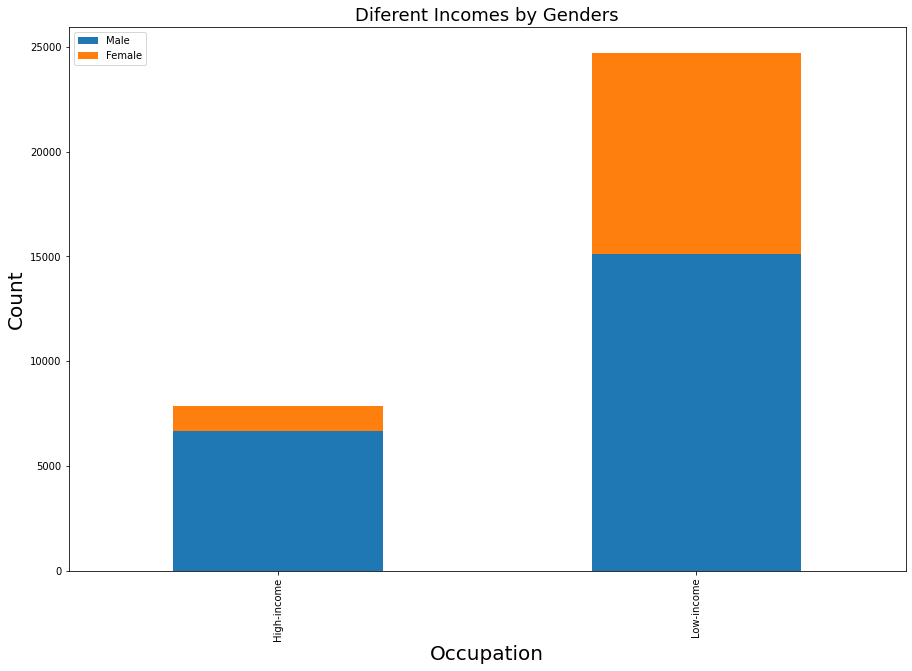

In [32]:
m = df_c[df_c.sex == 'Male']['income'].value_counts(sort=False)
w = df_c[df_c.sex == 'Female']['income'].value_counts(sort=False)
pd.DataFrame({'Male': m, 'Female': w}).plot.bar(stacked=True)
plt.gcf().set_size_inches(15, 10)
plt.title("Diferent Incomes by Genders", size=18)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=20)
plt.ylabel('Count', size=20)
plt.show()

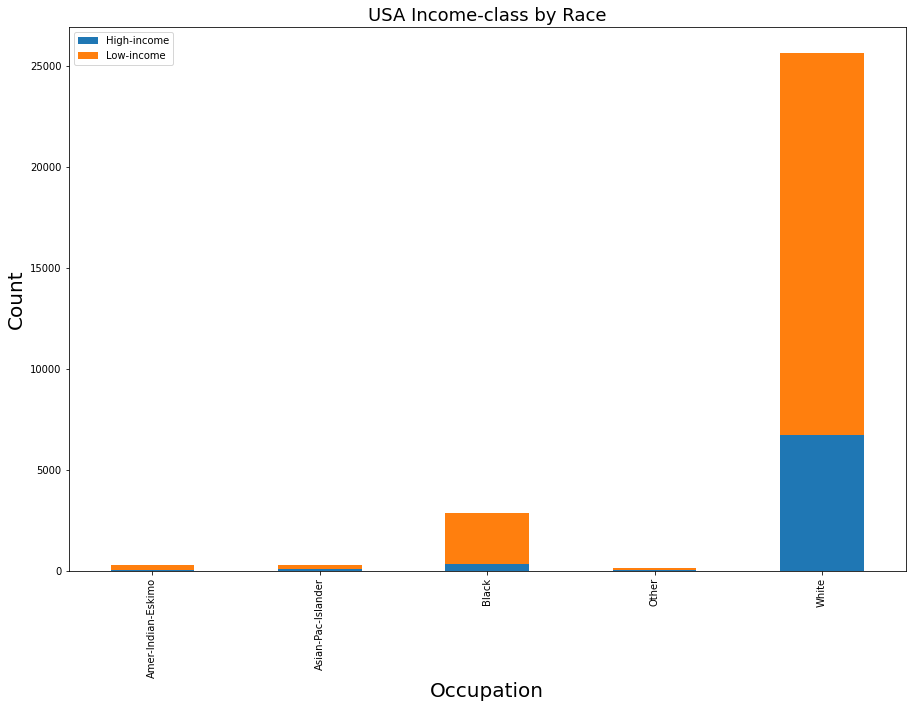

In [33]:
h = df_c[(df_c.income == 'High-income') & (df_c['native_country'] == 'United-States')]['race'].value_counts(sort=False)
l = df_c[(df_c.income == 'Low-income') & (df_c['native_country'] == 'United-States')]['race'].value_counts(sort=False)
pd.DataFrame({'High-income': h, 'Low-income': l}).plot.bar(stacked=True)
plt.gcf().set_size_inches(15, 10)
plt.title("USA Income-class by Race", size=18)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=20)
plt.ylabel('Count', size=20)
plt.show()

**Observation:**
1. There are small number of female employee who earn more.
2. In `USA`, people from `white` race hold more `high-income` jobs.

## II.IV. Preliminary observation

We made individual observations on the different plotting above. To summarize-

* We observed `gender` and `race` discrimination.
* There are more jobs in the job-market for medium education level (i.e. high-school graduates).
* There is no clear winner for a specific type of jobs; which is true is comparing to the society.

## II.V. Preprocessing for Classification

As I am planning to run classification algorithms on this dataset to classify higher and lower income group, I made further data processing to convert the text data to numeric one. This is a prerequisite for the algorithms I implemented and described later.

In [34]:
encoding_dict = {"workclass": {'State-gov':1, 'Self-emp-not-inc':2, 'Private':3, 'Federal-gov':4,
                               'Local-gov':5, 'Unknown':6, 'Self-emp-inc':7, 'Without-pay':8, 'Never-worked':9},
                 "education": {'Bachelors':1, 'HS-grad':2, '11th':3, 'Masters':4, '9th':5, 'Some-college':6,
                               'Assoc-acdm':7, 'Assoc-voc':8, '7th-8th':9, 'Doctorate':10, 'Prof-school':11,
                               '5th-6th':12, '10th':13, '1st-4th':14, 'Preschool':15, '12th':16},
                 "marital_status": {'Never-married':1, 'Married-civ-spouse':2, 'Divorced':3,
                                    'Married-spouse-absent':4, 'Separated':5, 'Married-AF-spouse':6, 'Widowed':7},
                 "occupation": {'Adm-clerical':1, 'Exec-managerial':2, 'Handlers-cleaners':3,
                                'Prof-specialty':4, 'Other-service':5, 'Sales':6, 'Craft-repair':7,
                                'Transport-moving':8, 'Farming-fishing':9, 'Machine-op-inspct':10,
                                'Tech-support':11, 'Unknown':12, 'Protective-serv':13, 'Armed-Forces':14,
                                'Priv-house-serv':15},
                 "relationship": {'Not-in-family':1, 'Husband':2, 'Wife':3, 'Own-child':4, 'Unmarried':5,
                                  'Other-relative':6},
                 "race": {'White':1, 'Black':2, 'Asian-Pac-Islander':3, 'Amer-Indian-Eskimo':4, 'Other':5},
                 "sex": {'Male':-1, 'Female':1},
                 "native_country": {'United-States':1, 'Cuba':2, 'Jamaica':3, 'India':4, 'Unknown':5, 'Mexico':6,
                                    'South':7, 'Puerto-Rico':8, 'Honduras':9, 'England':10, 'Canada':11,
                                    'Germany':12, 'Iran':13, 'Philippines':14, 'Italy':15, 'Poland':16,
                                    'Columbia':17, 'Cambodia':18, 'Thailand':19, 'Ecuador':20, 'Laos':21,
                                    'Taiwan':22, 'Haiti':23, 'Portugal':24, 'Dominican-Republic':25,
                                    'El-Salvador':26, 'France':27, 'Guatemala':28, 'China':29, 'Japan':30,
                                    'Yugoslavia':31, 'Peru':32, 'Outlying-US(Guam-USVI-etc)':33, 'Scotland':34,
                                    'Trinadad&Tobago':35, 'Greece':36, 'Nicaragua':37, 'Vietnam':38, 'Hong':39,
                                    'Ireland':40, 'Hungary':41, 'Holand-Netherlands':42},
                 "income": {'Low-income':-1, 'High-income':1},
                }

In [35]:
df_c.replace(encoding_dict, inplace = True)

In [36]:
# observe pairwise correlation of columns using library function
df_c.corr()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
age,1.000000,0.082380,-0.076646,0.007767,0.036527,0.424606,0.017201,-0.217767,-0.040000,-0.088832,0.077674,0.057775,0.068756,-0.011572,0.234037
workclass,0.082380,1.000000,-0.006314,0.011666,0.011343,0.035949,0.217072,0.015524,0.009359,0.019347,0.041172,0.012510,-0.028084,-0.010246,0.047203
fnlwgt,-0.076646,-0.006314,1.000000,0.024188,-0.043195,-0.023527,0.007892,0.017142,0.000500,-0.026858,0.000432,-0.010252,-0.018768,0.035910,-0.009463
education,0.007767,0.011666,0.024188,1.000000,-0.279614,0.008507,0.074961,0.044319,0.029638,0.000550,0.024154,-0.003192,-0.050025,0.067619,-0.046218
education_num,0.036527,0.011343,-0.043195,-0.279614,1.000000,-0.065996,-0.242997,-0.141075,-0.039760,-0.012280,0.122630,0.079923,0.148123,-0.066044,0.335154
marital_status,0.424606,0.035949,-0.023527,0.008507,-0.065996,1.000000,0.006524,0.029083,0.012722,0.181870,0.004460,0.006833,-0.000277,0.001912,0.002644
occupation,0.017201,0.217072,0.007892,0.074961,-0.242997,0.006524,1.000000,-0.016150,0.016586,-0.147779,-0.045060,-0.023963,-0.045240,0.019578,-0.104691
relationship,-0.217767,0.015524,0.017142,0.044319,-0.141075,0.029083,-0.016150,1.000000,0.096808,0.273414,-0.044045,-0.050498,-0.184873,0.042444,-0.171294
race,-0.040000,0.009359,0.000500,0.029638,-0.039760,0.012722,0.016586,0.096808,1.000000,0.067840,-0.007991,-0.017190,-0.033115,0.241650,-0.067713
sex,-0.088832,0.019347,-0.026858,0.000550,-0.012280,0.181870,-0.147779,0.273414,0.067840,1.000000,-0.048480,-0.045567,-0.229309,0.005977,-0.215980


# III. Method

As par the requirement of this assignment, I implemented the following four classification algorithms:

1. **Pocket Algorithm:** Pocket algorithm is a modification of binary classifcation algorithm namely `Perceptron`. A single perceptron is a `linear model` that applies a step function on the linear output. Similar to other `linear models`, it iterate over the training examples, and update the weights (i.e. $\wv_{i}$) in a way that would result in correct classification boundary. When the data is not linearly separable, there is `no guarantee on convergence`. Thus, for training, we need to set the `maximum number of iteration`. Also, the (`perceptron`) algorithm selects an arbitrary `hyperplane` that divides two classes, so it is possible to discover a decision boundary that is not the best. To overcome the unstability of the `perceptron algorithm`, the `pocket algorithm` keeps the best solution so far *in its pocket*. Thus, $\wv_{pocket}$ will contain the best solution (i.e. $\wv_{best}$) so far.
2. **QDA:** QDA (Quadratic Discriminant Analysis) is one type of Bayesian clssifier. QDA assumes that each class has its own covariance matrix; meaning the predictor variables are not assumed to have common variance across each of the individual groups. It is able to provide non-linear decision boundaries generated by fitting class conditional densities to the data and using Bayes’ rule. QDA primarily leverages the covariances of the data along with the different means in an unfiltered way.
3. **LDA:** LDA (Linear Discriminant Analysis) finds a linear combination of features that can be characterized (or separated) two or more classes. It determines the group means and (for each individual) computes the probability of belonging to the different groups. The individual is then assigned to the group with the highest probability score. It provides linear decision boundaries based on the assumption that the observations vary consistently across all classes.
4. **Logistic Regression:** Logistic Regression is an extension of `linear regression` to predict class for an observation. It considers a linear regression model that directly predicts $P(T=k \mid \xv)$, not the class label $k$.

## III.I. Super Classs Definition

Here is the definition of the super class for classification algorithms (i.e. `Classifier`). This is the base model for the implementation of the four classification models. I first completed the normalize() method here and kept the rest as provided. The abstract methods (i.e. `train` and `use`) will enable the unified interfaces for child classes to be overridden.

`Classifier` also contains the implementations of three helper functions `normalize`, `_check_matrix` and `add_ones` which helps normalizing the data, checking the dimentional constraint and adding a basis to the feature matrix respectively.

For the rest of implementation, I inherited this class and make my own `PocketAlgorithm`, `QDA_Algorithm`, `LDA_Algorithm`, and `LogisticRegression` classes.

In [37]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

Given predicted and target lebels, the following `confusion_matrix` function generate the confusion matrix. This is one of the key evaluation metrics described in the later section.

In [95]:
# Confustion matrix 

def confusion_matrix(Y, T):
    """
        Method for calculating confusion matrix
        
        Y    ndarray
             predicted labels
        T    ndarray
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

## III.II. Pocket Algorithm



The `PocketAlgorithm` class have two private variables; `alpha` and `w_pocket`. `alpha` represents the learning rate and `w_pocket` acts as the pocket (i.e. hold best `w`). This class implements two methods from it's parent class; `train` and `use`.

The `train` method is responsible to training the model and calculate the best weight for the model. This method iterates over the input samples and updates the weight based on the formulation of perceptron algorithm. In each iteration this method compares the updated weight $w.r.t.$ the one from the pocket. If found better, the weight is copied to the `w_pocket`.

The `use` method is responsible to predict the class of the test input. It returns the dot product of the input and the `w_pocket`. As of standard prodedure, one needs to call the `train` method before calling this one.

One important note is, as the pocket algorithm takes huge time to complete it's iteration (it iterates over all the input samples and for each each input sample iterates over all the features), I set a lower value (i.e. $100$) as the maximum iteration. This is quite small value comparing to the standard implementations. The expectation is, the pocket will not be updated frequently and the performance may not be very good.

In [39]:
from copy import deepcopy as copy 

class PocketAlgorithm(Classifier):
    """
        Class for Pocket classification model
        
        Attributes
        ==========
        alpha       learning rate
    """
    
    def __init__(self, alpha):
        Classifier.__init__(self)
        self.alpha = alpha
        self.w_pocket = None
        self.maxiter = 100
           
    # train PocketAlgorithm model and store the best weights in w_pocket
    def train(self, X, T):
        N = X.shape[0]
        X1 = self.add_ones(X)
        w = np.zeros(X1.shape[1])
        self.w_pocket = copy(w)
        missed_pocket = N + 1
        for i in range(self.maxiter):
            converged = True
            for k in range(N):
                missed = 0
                for x, t in zip(X1, T):
                    y = np.dot(w, x)
                    yt = 1.0 if (y > 0) else -1.0

                    if y != yt:
                        missed += 1
                        converged = False
                        delta = t - yt
                        w += (self.alpha * delta * x)
    
            if missed < missed_pocket:
                print("pocket update at: ", i)
                self.w_pocket = copy(w)
                missed_pocket = missed
                
            if converged:
                print("converged at ", i)
                break

        print("End of training: ", i)
        
    # apply the learned model to data X
    def use(self, X):
        N = X.shape[0]
        X1 = self.add_ones(X)
        Y1 = X1 @ self.w_pocket
        return Y1

## III.III. QDA



As the name suggests, `QDA_Algorithm` class inherits the base `Classifier` class to implement the QDA algorithm. It inherits the `train` and `use` method and adds logic for the QDA algorithm.

The `train` method returns the mean and covariance on input set. The `use` method represents the formulation of QDA algorithm by first calculating the inverse of covarience and gap between the sample and mean.

In [77]:
from copy import deepcopy as copy 

class QDA_Algorithm(Classifier):
    """
        Class for QDA classification model
    """
    
    def __init__(self):
        Classifier.__init__(self)

    # calculate the mean and covarience on the input data X from starting (s) to end (e) boundary
    def train(self, X, S, E):
        mu = np.mean(X[S:E], 0)
        Sigma = np.cov(X[S:E].T)
        return mu,Sigma

    # apply the learned model to data X
    def use(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        dif = X - mu
        return np.log(prior) - (1/2 * np.log(np.linalg.det(sigma))) \
            - (1/2 * np.sum(dif @ sigma_inv * dif, axis=1))

## III.IV. LDA



The `LDA_Algorithm` class inherits the `Classifier` class and gives the implementation of `train` and `use` method for LDA algorithm.

The `train` method calculates the mean on the input data. The `use` method formulates the LDA equation given by input, mean, covarience and prior. This is quite straight forward implementation of the LDA formula. The derivation of the LDA formula is outside of the scope of this assignment.

In [83]:
from copy import deepcopy as copy 

class LDA_Algorithm(Classifier):
    """
        Class for LDA classification model
    """
    
    def __init__(self):
        Classifier.__init__(self)

    # calculate the mean on the input data X from starting (s) to end (e) boundary
    def train(self, X, S, E):
        mu = np.mean(X[S:E], 0)
        return mu

    # apply the learned model to data X
    def use(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum((X @ sigma_inv * mu) \
                - (1/2 * mu @ sigma_inv * mu) \
                + np.log(prior), axis=1)

## III.V. Logistic Regression



The `LogisticRegression` class inherits the `Classifier` base class to implement the `train` and `use` phases of logistic regression. This class contains one private variable `alpha` and two helper method; `softmax` and `g`. 

The variable `alpha` represents the training rate. The `softmax` and `g` methods helps doing the softmax transformation. Softmax transformation is a generalization of the logistic function to multiple dimensions. The details of softmax transformation is skiped here as it is outside of the scope of this assignment.

The `train` method iteratively updates the weight by calculating the derivative of the softmax transformation. As usual, the `use` method formulates the logistic regression logic.

In [94]:
from copy import deepcopy as copy
class LogisticRegression(Classifier): 
    """
        Class for Logistic Regression classification model
        
        Attributes
        ==========
        alpha       learning rate
    """
    def __init__(self, alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self, X, w):
        return self.softmax(X @ w) 
        
    # update w
    def train(self, X, T):
        X = self.normalize(X)
       
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        self.w = np.random.rand(D + 1, K)

        niter = 10
        X = self.add_ones(X)
        
        T = self.add_ones(T.reshape(-1,1))
        
        for step in range(niter):
            ys = self.g(X,self.w)
            self.w += self.alpha * X.T @ (T - ys)                
    
    # apply the learned model to data X
    def use(self, X):
        Xs = (X - self.meanX) / self.stdX
        Xs = self.add_ones(Xs)
        return self.g(Xs, self.w)

# IV. Experiments

In this section, I made expetimentation on the classfiers (described in section $III$) by applying the data (described in section $II$) and discuss the results by $w.r.t.$ the evaluation metrics (described in section $IV.I$).

## IV.I. Evaluation Metrics

I used the following evaluation metrics to test the performance of classification algorithm's implementation:

1. **Confusion matrix:** A confusion matrix of binary classification is a two by two table formed by counting of the number of the four outcomes of a binary classifier. We usually denote them as $TP$, $FP$, $TN$, and $FN$. The expectation is $TP$ and $TN$ should contain higher value; as we know $FP$ and $FN$ values occur when the actual class contradicts with the predicted class.
    * **True Positives (TP) -** These are the correctly predicted positive values.
    * **True Negatives (TN) -** These are the correctly predicted negative values.
    * **False Positives (FP) –** This indicate the count of the cases when actual class is no and predicted class is yes.
    * **False Negatives (FN) –** This indicate the count of the cases when actual class is yes but predicted class in no.
2. **ROC curve:** Receiver Operating Characteristic (ROC) curve is a graph showing the performance of a classification model at all classification thresholds. This curve plots the following two parameters:
    * True Positive (TP) Rate
    * False Positive (FP) Rate
3. **Accuracy:** Accuracy is the ratio of correctly predicted observation to the total observations (i.e. $\frac{TP+TN}{TP+FP+FN+TN}$).
4. **Precision:** Precision attempts to find the proportion of correct positive identifications (i.e. $\frac{TP}{TP+FP}$).
5. **Recall:** Recall attempts to find the proportion of correct actual positive identifications (i.e. $\frac{TP}{TP+FN}$).
6. **F1 score:** F1 Score is needed when we want to seek a balance between Precision and Recall (i.e. $2 * \frac{Precision * Recall}{Precision + Recall}$).

All the evaluation metrics have been calculated and plotted for all the four classififcation algorithms bellow. Confusion matrix has been calcuated by the method described before. For calculating precision, recall, F1 score, and ROC curve I used `sklearn.metrics` library support. These can be easily implemented from the confusion matrix, but for simplicity used the standard library. This is also beyond the scope of this project.

## IV.II. Experimentation on Classification Algorithms

In this section I have done the experimentation on the four classification algorithms described above. As of the standard practice, I partition the data into training and testing set. To evaluate the performance, I plotted and calculated the corresponding evaluation metrics mentioned above.

As the `Pocket` algorithm takes extreme amount of time, I randomly choose $1000$ samples for training and $200$ samples for testing. We can apply guided selection technique for better result. But, I kept this as the future improvement.

For rest of the algorithm choices (i.e. `QDA`, `LDA`, and `Logistic Regression`) I randomly select $8000$ samples for training and $2500$ samples for testing (i.e. $10500$ random data sample considered for the overall experiment).

After the long discussion about `feature selection` for classification algorithms (in the class), I made educated guess on this regard. From all the feature set, I picked `age`, `education_num`, `capital_gain`, `capital_loss`, and `hours_per_week` features to make the classification on `income`.

In [43]:
# randomly shuffel all data
df_c.sample(frac=1)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
5945,20,3,116375,5,5,1,6,4,1,1,0,0,40,1,-1
31249,34,3,347166,6,10,2,1,2,1,-1,0,0,40,1,-1
30450,39,6,86551,16,8,2,12,2,1,-1,0,0,40,1,-1
9366,19,3,158343,6,10,1,11,4,1,1,0,0,40,5,-1
24812,37,3,280500,6,10,1,11,4,2,1,0,0,40,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15980,20,3,91733,6,10,1,6,4,1,1,0,0,8,1,-1
15791,39,3,314007,8,11,2,11,2,1,-1,0,0,40,1,-1
23938,60,7,210827,1,13,2,4,2,1,-1,7688,0,40,1,1
31764,61,3,181219,1,13,2,4,2,1,-1,0,1848,40,1,1


### IV.II.I. Experimentation on Pocket Algorithm

pocket update at:  0
End of training:  99


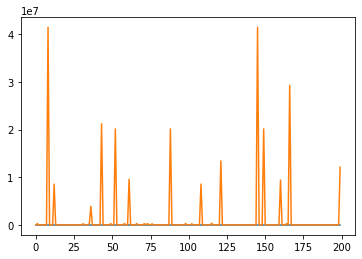

In [72]:
# list of significant features
sig_features = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# list of target features
target_features = ['income']

# training data partition threshold
# train_data_th = 25000
train_data_th = 1000

# partitioning unscaled-data of most significant co-related features (i.e. correlation_val >= 0.5)
X = df_c[sig_features].copy()
X_Train = np.array(X.iloc[:train_data_th])
X_Test = np.array(X.iloc[train_data_th:1200])

# partitioning unscaled-data of target features
T = df_c[target_features].copy()
T_Train = np.array(T.iloc[:train_data_th])
T_Test = np.array(T.iloc[train_data_th:1200])
# print(T_Test.shape)

pkt = PocketAlgorithm(0.1)
pkt.train(X_Train, T_Train)
Y = pkt.use(X_Test)

plt.plot(T_Test)
plt.plot(Y)

In [73]:
confusion_matrix(np.sign(Y),np.sign(T_Test).flatten())

,-1,1
-1,16,0
1,131,53


In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve

Y = np.where(Y > 0,1,-1)
print("Precision: {:.2f}%".format(100 * precision_score(T_Test,Y)))
print("Recall: {:.2f}%".format(100 * recall_score(T_Test,Y)))
print("F1 score: {:.2f}%".format(100 * f1_score(T_Test,Y)))

Precision: 28.80%
Recall: 100.00%
F1 score: 44.73%


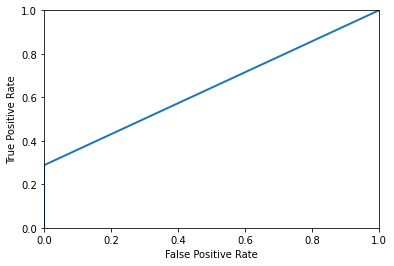

In [75]:
falsepos, truepos, thresholds = roc_curve(Y,T_Test, pos_label=None)
plt.plot(falsepos, truepos,linewidth=2, label= None)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

Accuracy:  30.25999999999999 %


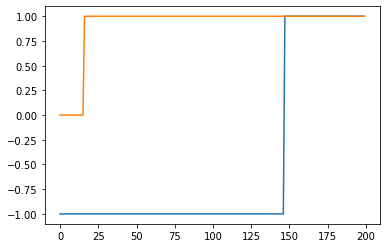

In [76]:
Yl = np.where(Y<0,0,1)
Tl = np.where(T_Test<0,0,1)

plt.plot(np.sort(T_Test,0))
plt.plot(np.sort(Yl,0))

print("Accuracy: ", 100 - np.mean(np.abs(Tl - Yl)) * 100, "%")

### IV.II.II. Experimentation on QDA

In [143]:
df_qda = df_c[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income']]
df_qda = df_qda.sample(10500)
df_qda_train = df_qda[:8000]
df_qda_test = df_qda[8000:]

T_Test = df_qda_test.drop(columns =['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week'])
df_qda_test = df_qda_test.drop(columns =['income'])

print("Total training entries:", len(df_qda_train))
c1 = df_qda_train[df_qda_train['income'] > 0]
c2 = df_qda_train[df_qda_train['income'] < 0]
print("Class-1 training entries:", len(c1))
print("Class-2 training entries:", len(c2))

C1 = c1[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']]
N1 = len(C1)
C2 = c2[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']]
N2 = len(C2)

X = np.vstack((C1, C2))
N = N1 + N2

qda = QDA_Algorithm()
Xs = qda.normalize(X)

mu1,Sigma1 = qda.train(Xs, 0, N1)
mu2,Sigma2 = qda.train(Xs, N1, N)

prior1 = N1 / N
prior2 = N2 / N

xs, ys = np.meshgrid(np.linspace(-3, 7, 50), np.linspace(-3, 7, 50))
#df2_test = np.vstack((xs.flat, ys.flat)).T
XtestS = qda.normalize(df_qda_test.values)
d1 = qda.use(XtestS, mu1, Sigma1, prior1)
d2 = qda.use(XtestS, mu2, Sigma2, prior2)

Total training entries: 8000
Class-1 training entries: 1901
Class-2 training entries: 6099


d1 shape: (2500,)
d2 shape: (2500,)
xs shape: (50, 50)
Xs shape: (8000, 5)
ys shape: (50, 50)


Text(0.5, 0, 'QDA P(x|Class=k)\n from disc funcs')

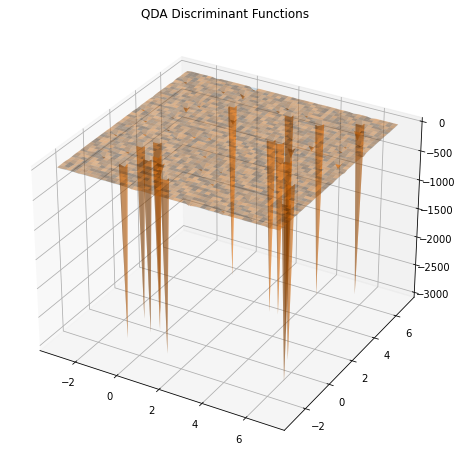

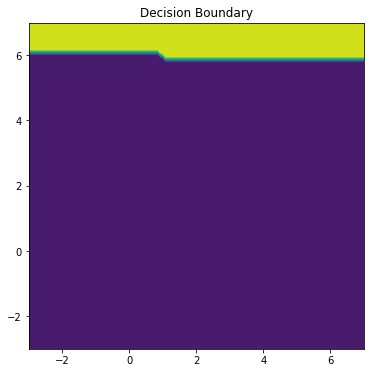

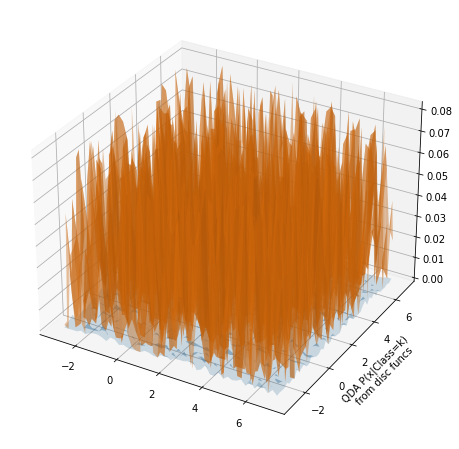

In [144]:
print("d1 shape:", d1.shape)
print("d2 shape:", d2.shape)
print("xs shape:", xs.shape)
print("Xs shape:", Xs.shape)
print("ys shape:", ys.shape)

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, d1.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d2.reshape(xs.shape), alpha=0.4)
plt.title("QDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, np.sort((d1-d2 > 0),0).reshape(xs.shape))
plt.title("Decision Boundary")
#plt.plot(C1[:], 'or')
#plt.plot(C2[:],'xb')

# Plot generative distributions  p(x | Class=k)  starting with discriminant functions

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

prob1 = np.exp( d1.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(prior1))
prob2 = np.exp( d2.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(prior2))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)

plt.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")

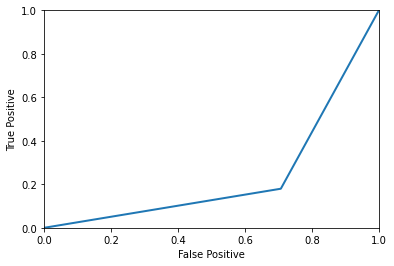

In [145]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

D_qda = []
D_qda.append(d1)
D_qda.append(d2)

D_qda = np.argmax(D_qda, axis=0)
for i in range(len(D_qda)):
    if D_qda[i] == 0:
        D_qda[i] = -1

falsepos, truepos, thresholds = metrics.roc_curve(D_qda, T_Test, pos_label=None)
plt.plot(falsepos, truepos, linewidth=2, label=None)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

Accuracy:  18.53088000000001 %


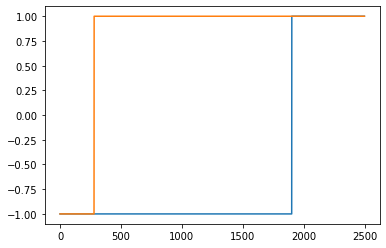

In [146]:
Tl = np.where(T_Test==-1,0,1)

plt.plot(np.sort(T_Test,0))
plt.plot(np.sort(D_qda,0))

print("Accuracy: ", 100 - np.mean(np.abs(Tl - D_qda)) * 100, "%")

In [147]:
confusion_matrix(np.sign(D_qda), np.sign(T_Test.values).flatten())

,-1,1
-1,82,198
1,1821,399


In [148]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

print("Precision: {:.2f}%".format(100 * precision_score(T_Test, D_qda, average='micro')))
print("Recall: {:.2f}%".format(100 * recall_score(T_Test, D_qda, average='micro')))
print("F1 score: {:.2f}%".format(100 * f1_score(T_Test, D_qda, average='micro')))

Precision: 19.24%
Recall: 19.24%
F1 score: 19.24%


### IV.II.III. Experimentation on LDA

In [132]:
df_lda = df_c[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income']]
df_lda = df_lda.sample(10500)
df_lda_train = df_lda[:8000]
df_lda_test = df_lda[8000:]

T_Test = df_lda_test.drop(columns =['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week'])
df_lda_test = df_lda_test.drop(columns =['income'])

print("Total training entries:", len(df_lda_train))
c1 = df_lda_train[df_lda_train['income'] > 0]
c2 = df_lda_train[df_lda_train['income'] < 0]
print("Class-1 training entries:", len(c1))
print("Class-2 training entries:", len(c2))

C1 = c1[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']]
N1 = len(C1)
C2 = c2[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']]
N2 = len(C2)

X = np.vstack((C1, C2))
N = N1 + N2

lda = LDA_Algorithm()
Xs = lda.normalize(X)

mu1 = lda.train(Xs,0,N1)
mu2 = lda.train(Xs,N1,N)

Sigma = np.cov(Xs.T)
prior1 = N1 / N
prior2 = N2 / N

## now compute the discriminant function on test data
xs, ys = np.meshgrid(np.linspace(-3,7, 50), np.linspace(-3,7, 50))
Xtest = np.vstack((xs.flat, ys.flat)).T
XtestS = lda.normalize(df_lda_test.values)
d1 = lda.use(XtestS, mu1, Sigma, prior1)
d2 = lda.use(XtestS, mu2, Sigma, prior2)

Total training entries: 8000
Class-1 training entries: 1882
Class-2 training entries: 6118


Text(0.5, 1.0, 'Decision Boundary')

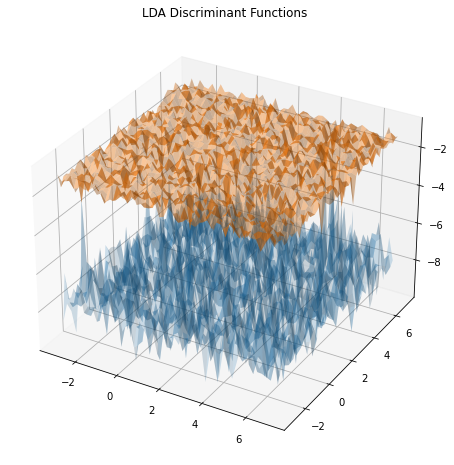

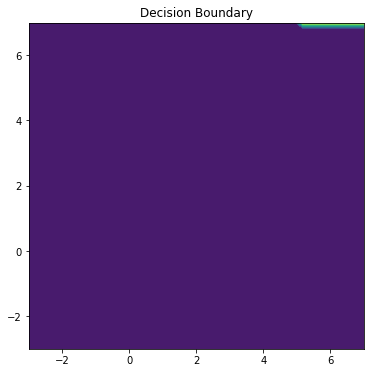

In [133]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, d1.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d2.reshape(xs.shape), alpha=0.4)
plt.title("LDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys,np.sort((d1-d2 > 0),0).reshape(xs.shape))
plt.title("Decision Boundary")

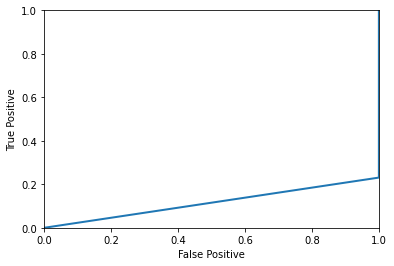

In [134]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

D_lda = []
D_lda.append(d1)
D_lda.append(d2)

D_lda = np.argmax(D_lda, axis=0)

for i in range(len(D_lda)):
    if D_lda[i] == 0:
        D_lda[i] = -1

falsepos, truepos, thresholds = metrics.roc_curve(D_lda, T_Test, pos_label=None)
plt.plot(falsepos, truepos, linewidth=2, label= None)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

Accuracy:  23.2128 %


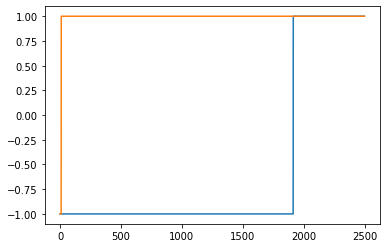

In [140]:
Tl = np.where(T_Test==-1,0,1)

plt.plot(np.sort(T_Test,0))
plt.plot(np.sort(D_lda,0))

print("Accuracy: ", 100 - np.mean(np.abs(Tl - D_lda)) * 100, "%")

In [141]:
confusion_matrix(np.sign(D_lda), np.sign(T_Test.values).flatten())

,-1,1
-1,0,10
1,1915,575


In [142]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

print("Precision: {:.2f}%".format(100 * precision_score(T_Test, D2, average='micro')))
print("Recall: {:.2f}%".format(100 * recall_score(T_Test, D2, average='micro')))
print("F1 score: {:.2f}%".format(100 * f1_score(T_Test, D2, average='micro')))

Precision: 23.56%
Recall: 23.56%
F1 score: 23.56%


### IV.II.IV. Experimentation on Logistic Regression

In [127]:
df_lr = df_c[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income']]
df_lr = df_lr.sample(10500)
df_lr_train = df_lr[:8000]
df_lr_test = df_lr[8000:]

X_Test = df_lr_test[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']].values
T_Test = df_lr_test[['income']].values

X_Train = df_lr_train[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']].values
T_Train = df_lr_train[['income']].values

lr = LogisticRegression(0.000999)
lr.train(X_Train, T_Train)
Y = lr.use(X_Test)

Accuracy:  74.131968 %


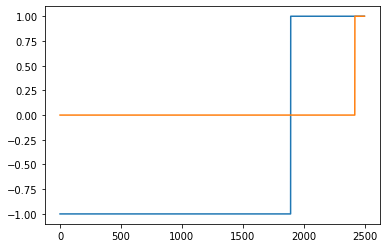

In [128]:
Yl = np.argmax(Y, 1)
Tl = np.where(T_Test==-1,0,1)

plt.plot(np.sort(T_Test,0))
plt.plot(np.sort(Yl,0))

print("Accuracy: ", 100 - np.mean(np.abs(Tl - Yl)) * 100, "%")

In [129]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

print("Precision: {:.2f}%".format(100 * precision_score(T_Test, Yl, average='micro')))
print("Recall: {:.2f}%".format(100 * recall_score(T_Test, Yl, average='micro')))
print("F1 score: {:.2f}%".format(100 * f1_score(T_Test, Yl, average='micro')))

Precision: 2.36%
Recall: 2.36%
F1 score: 2.36%


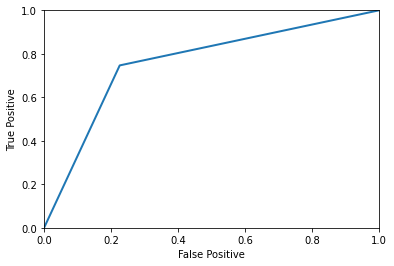

In [130]:
falsepos, truepos, thresholds = metrics.roc_curve(Yl, T_Test, pos_label=None)
plt.plot(falsepos, truepos,linewidth=2, label= None)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [131]:
for i in range(len(Yl)):
    if Yl[i] == 0:
        Yl[i] = -1

confusion_matrix(np.sign(Yl), np.sign(T_Test).flatten())

,-1,1
-1,1874,547
1,20,59


## IV.II. Train and Test Accuracies

The evaluation metrics have been calculated in the corresponding experimentation subsections (each of the four classififcation algorithms). ROC curve has also been plotted for all the algorithms. ROC curve shows that performance of `logistic regression` is better than others. We know that classifiers that give curves closer to the top-left corner indicate a better performance. The closest competitor of `logistic regression` is the `pocket classifier`. But as mentioned above, the pocket classifier takes longer time comparing with `QDA` and `LDA` classifier; and I selected small sample for evaluating `pocket classifier`.

To further evaluate the results, I have calculated the `precesion`, `recall`, and `F1 score` for each of the four algorithms. I used `sklearn.metrics` library support to calculate these metrics. The `confusion matrix` along with these three metrics supports the suprimecy of the `logistic regression` among all the four classifiers.

## IV.III. Classification Model Comparison

<table>
    <tr>
        <th>Algorithms</th>
        <th colspan="4" align="middle">Evaluation Metrices</th>
    </tr>
    <tr>
        <th></th>
        <th>Accuracy</th>
        <th>Precision</th>
        <th>Recall</th>
        <th>F1 score</th>
    </tr>
    <tr>
        <th>Pocket Algorithm</th>
        <td>30.25%</td>
        <td>28.80%</td>
        <td>100.00%</td>
        <td>44.73</td>
    </tr>
    <tr>
        <th>QDA</th>
        <td>18.53</td>
        <td>21.08%</td>
        <td>21.08%</td>
        <td>21.08%</td>
    </tr>
    <tr>
        <th>LDA</th>
        <td>23.21%</td>
        <td>31.32%</td>
        <td>31.32%</td>
        <td>31.32%</td>
    </tr>
    <tr>
        <th>Logistic Regression</th>
        <td>74.74%</td>
        <td>2.00%</td>
        <td>2.00%</td>
        <td>2.00%</td>
    </tr>
    <tr>
      <td colspan="5" align="midle"></td>
    </tr>
    <caption style="caption-side:bottom;text-align:center">Table I: Comparison of the Classification Algorithms</caption>
</table>

The $Table I$ contains the evaluating metrics results. It is easily observable that, for this particular dataset `logistic regression` is performing `the best` among the four classification algorithms that have been implemented in this assignment.

As mentioned before, `pocket` utilizes the `perctron` learning techinque perform very slow comparing with the other three classification algorithm. I feel, we should try to skip using `pocket` classifier for large dataset with lots of features. QDA gives a quadratic decision boundary and usually able to adress a wider range of problems comparing with any linear model. Although the performance of QDA on this dataset does not perform very well. I believe this could be due to the nature of data and can further be evaluated using advanced visualization technique.

# V. Conclusions

The classification was done using four different algorithms (i.e. `pocket algorithm`, `QDA`, `LDA`, and `logistic regression`). It was a great experience implementing the classification models from the scratch and evaluate $w.r.t$ a real-world dataset.

The `pocket` algorithm took a huge amount of time comparetively small number of iterations (i.e. $100$). This algorithm is easy to understand but comparatively harder to implement efficiently. The learning from this experiment is, we should not consider `pocket` algorithm as the default classifier. The formulation of `QDA`, `LDA` and `logistic regression` was very hard to understand; although the implementation is quite straight forward. Although `logistic regression` performs best among all the classifier, I believe the rest of the classifiers also have some usecase.

Due to the limited time, I didn't able to check different feature selection techniques for the classification algorithm (and it was also outside of the scope of this assignment). But, I am feeling without proper feature selection, classifiers may not perform as expected.

It is worth mentioning that$-$although this assignment covers a big area of classification algorithms and give us chance to explore in this domain$-$it is very difficult to cover everything in a single assignment. I believe, this assignment can easily be extendable as a term project.

# VI. References

1. Lorenzo De Tomasi (2018). Income classification, Prediction task is to determine whether a person makes over 50K a year, Version 1. Retrieved September 22, 2020 from https://www.kaggle.com/lodetomasi1995/income-classification

2. "DataSklr: Linear and Quadratic Discriminant Analysis," https://www.datasklr.com/select-classification-methods/linear-and-quadratic-discriminant-analysis, accessed Oct. 25, 2020.

3. "Data Blog: Linear and Quadratic Discriminant Analysis," https://xavierbourretsicotte.github.io/LDA_QDA.html, accessed Oct. 25, 2020.

# VII. Extra Credit

* [OPT 1] Search for a ordinal data set and apply your classifiers to it. 
  - Repeat the experiments on it. 
  - Do you have different observation from previous results? 
  - Were you able to observe that we discussed in class about logistic regression? 
  - For a full extra credit point, you need to discuss all bullet points in Results section.     


* [OPT 2] Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.

<font color="red"> SKIPPED!!! </font>

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 



points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 points for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |References
5 | |Grammar and spelling error (Proofread please)